In [1]:
# working with directories
import os

# working with numbers
import pandas as pd
import numpy as np

# reading images
from PIL import Image

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
weather_dict = {}
for wc in os.listdir("Dataset"):
    for wi in os.listdir(f"Dataset/{wc}"):
        weather_dict[wi] = wc

In [3]:
# Set up a dataframe of image names and respective weathers
df = pd.DataFrame.from_dict(weather_dict, orient='index')
df.reset_index(inplace=True)
df.columns = ['img_name', 'weather']
df = df.loc[:, ['weather', 'img_name']]
df.sample(10)

,weather,img_name
523,dew,2731.jpg
3103,hail,0440.jpg
4945,rime,5486.jpg
2154,glaze,6220.jpg
376,dew,2584.jpg
5512,rime,6053.jpg
4682,rime,5223.jpg
6578,snow,1231.jpg
2781,hail,0118.jpg
2161,glaze,6227.jpg


In [4]:
# Check if all the images have the same extension
df.img_name.str.split('.').str[1].unique()

array(['jpg'], dtype=object)

In [5]:
grouped = df.groupby('weather')['img_name'].count().to_frame()
grouped.reset_index(inplace=True)
grouped.columns = ['Weather', 'Count']

In [6]:
fig = px.bar(grouped, x='Weather', y='Count', 
             title='<b>Number of images by each weather category</b>', 
             color='Count') 

fig.update_layout(
    font_family="Courier New, monospace",
    font_size=12,
    font_color="#0c8df5",
    title_font_color="#0c8df5",
    title_font_family="Courier New, monospace",
    title_x=0.5
)

fig.show()

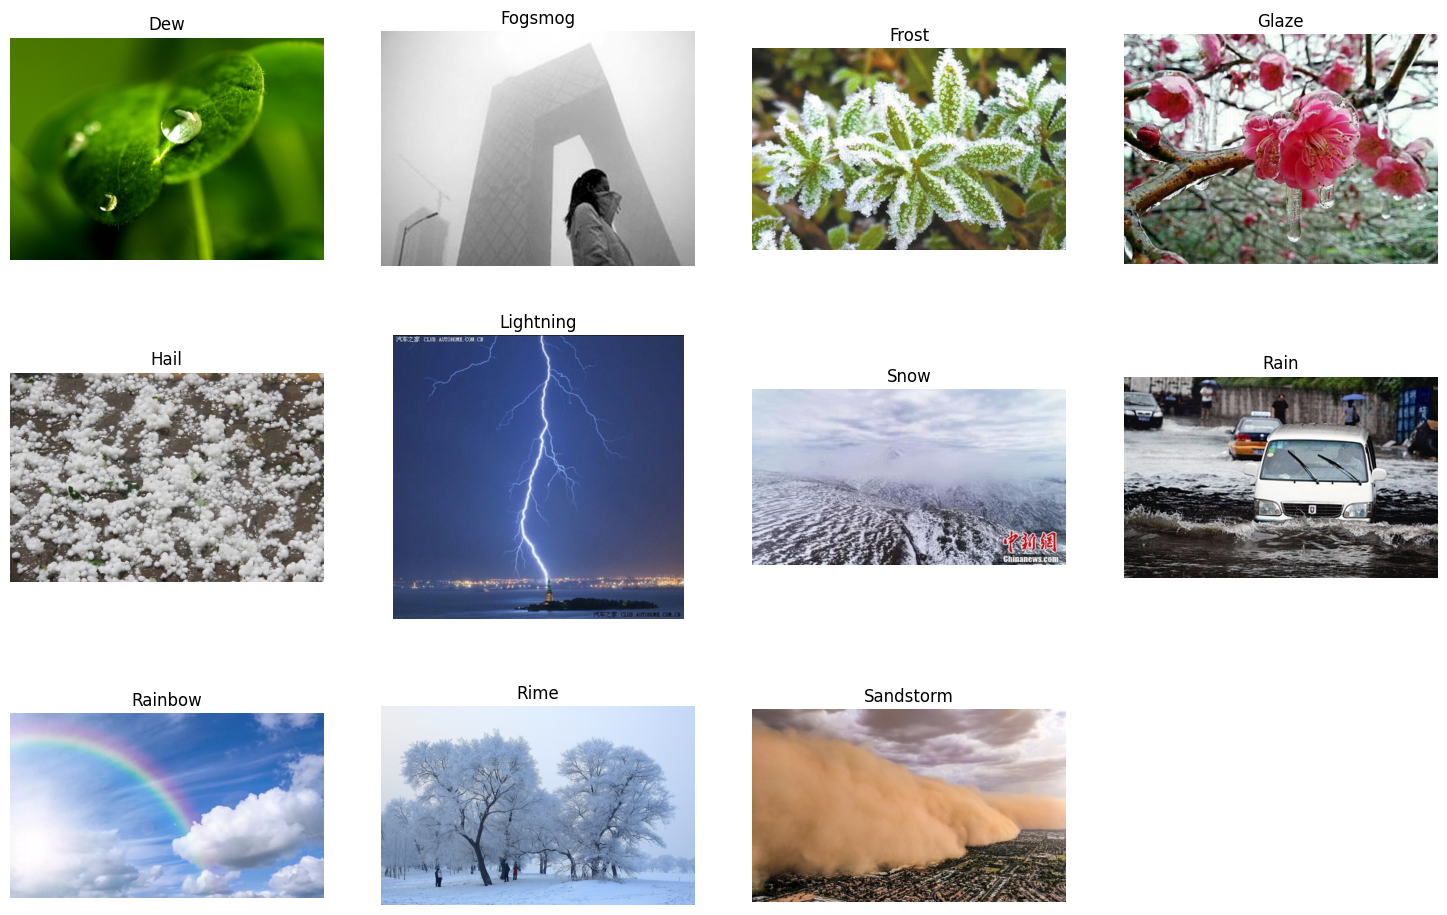

In [124]:
# get images to plot
images = df.groupby('weather').head(1)
images = {images.loc[idx, 'weather'] : \
    Image.open(f"Dataset/{images.loc[idx, 'weather']}/\{images.loc[idx, 'img_name']}")\
    for idx in images.index}

# create the figure
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.tight_layout()
# flatten axs so that we can easily access their indices
axs = axs.flatten()

# plot images
for i, img in enumerate(images):
    axs[i].imshow(images[img])
    axs[i].set(title=img.title())
    axs[i].axis('off')

# Remove empty subplot
for ax in axs.flat[11:]:
    ax.remove()

plt.show;